## Hypothesis

The 2016 Presidential Election is said to be impacted by fake news influencing voter decisions, presumably those with a lower ability to discern misleading prose containing falsehoods. 

Using the FIPS Code county classification to merge a dataset showing county-level results for citizens lacking basic prose literacy skills with the county-level 2016 President Election voting results, a relationship between literacy and voter preference will be evident.

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("2016_US_County_Level_Presidential_Results.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 11 columns):
Unnamed: 0        3141 non-null int64
votes_dem         3141 non-null float64
votes_gop         3141 non-null float64
total_votes       3141 non-null float64
per_dem           3141 non-null float64
per_gop           3141 non-null float64
diff              3141 non-null object
per_point_diff    3141 non-null object
state_abbr        3141 non-null object
county_name       3141 non-null object
combined_fips     3141 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 270.0+ KB


In [5]:
len(df['county_name'].unique())

1848

In [6]:
df.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013
1,1,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016
2,2,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020
3,3,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050
4,4,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060


In [7]:
df.loc[:,'state_abbr':'county_name']

,state_abbr,county_name
0,AK,Alaska
1,AK,Alaska
2,AK,Alaska
3,AK,Alaska
4,AK,Alaska
5,AK,Alaska
6,AK,Alaska
7,AK,Alaska
8,AK,Alaska
9,AK,Alaska


In [8]:
df['county_name'].value_counts()

Washington County       30
Alaska                  29
Jefferson County        25
Franklin County         24
Lincoln County          23
Jackson County          23
Madison County          19
Montgomery County       18
Clay County             18
Monroe County           17
Union County            17
Marion County           17
Wayne County            16
Warren County           14
Grant County            14
Greene County           14
Carroll County          13
Lake County             12
Adams County            12
Johnson County          12
Polk County             12
Douglas County          12
Marshall County         12
Clark County            12
Lee County              12
Scott County            11
Fayette County          11
Calhoun County          11
Lawrence County         11
Morgan County           11
                        ..
Story County             1
Uinta County             1
Galax city               1
Banks County             1
Saginaw County           1
Greenbrier County        1
S

In [9]:
df.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013
1,1,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016
2,2,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020
3,3,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050
4,4,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060


In [10]:
df = df.rename(columns = {"combined_fips" : "FIPS code"})

In [11]:
df2 = pd.read_csv("Low_Lit.csv")

In [12]:
df2.head()

,Location,FIPS code,Population size1,Percent lacking basic prose literacy skills2,Lower bound,Upper bound
0,Autauga County,1001,"34,760",12.68,6.214303,22.272247
1,Baldwin County,1003,"117,486",10.62,5.127570,18.981933
2,Barbour County,1005,"20,310",23.16,12.001603,38.357039
3,Bibb County,1007,"15,384",17.50,8.766921,30.043296
4,Blount County,1009,"41,510",13.93,6.801854,24.360314


In [13]:
df2 = df2.rename(columns = {"Percent lacking basic prose literacy skills2" : "per_lacking_basic_prose_literacy"})

In [14]:
df3 = pd.merge(df, df2, on='FIPS code', how='outer')

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3146 entries, 0 to 3145
Data columns (total 16 columns):
Unnamed: 0                          3141 non-null float64
votes_dem                           3141 non-null float64
votes_gop                           3141 non-null float64
total_votes                         3141 non-null float64
per_dem                             3141 non-null float64
per_gop                             3141 non-null float64
diff                                3141 non-null object
per_point_diff                      3141 non-null object
state_abbr                          3141 non-null object
county_name                         3141 non-null object
FIPS code                           3146 non-null int64
Location                            3138 non-null object
Population size1                    3138 non-null object
per_lacking_basic_prose_literacy    3138 non-null float64
Lower bound                         3138 non-null float64
Upper bound                    

In [16]:
df3.isnull().values.any()

True

In [17]:
df3.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,FIPS code,Location,Population size1,per_lacking_basic_prose_literacy,Lower bound,Upper bound
0,0.0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013,Aleutians East Borough,"1,246",27.37,13.967054,44.696848
1,1.0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016,Aleutians West Census Area,"2,759",21.32,10.381514,36.585601
2,2.0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020,Anchorage Borough,"194,293",8.73,4.095766,15.951059
3,3.0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050,Bethel Census Area,"10,653",14.47,6.917693,25.662369
4,4.0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060,Bristol Bay Borough,837,8.16,3.791944,14.851478


In [18]:
df3.tail(50)

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,FIPS code,Location,Population size1,per_lacking_basic_prose_literacy,Lower bound,Upper bound
3096,3096.0,1821.0,7169.0,9385.0,0.194033,0.763879,"5,348",56.98%,WV,Nicholas County,54067,Nicholas County,"20,999",15.00,7.700000,27.000000
3097,3097.0,5452.0,11077.0,17819.0,0.305966,0.621640,"5,625",31.57%,WV,Ohio County,54069,Ohio County,"35,012",11.00,5.100000,19.100000
3098,3098.0,726.0,2388.0,3212.0,0.226027,0.743462,"1,662",51.74%,WV,Pendleton County,54071,Pendleton County,"6,246",15.00,7.200000,25.300000
3099,3099.0,620.0,2342.0,3130.0,0.198083,0.748243,"1,722",55.02%,WV,Pleasants County,54073,Pleasants County,"5,703",14.00,6.800000,24.200000
3100,3100.0,924.0,2474.0,3619.0,0.255319,0.683614,"1,550",42.83%,WV,Pocahontas County,54075,Pocahontas County,"7,100",15.00,7.500000,26.100000
3101,3101.0,2462.0,9501.0,12611.0,0.195226,0.753390,"7,039",55.82%,WV,Preston County,54077,Preston County,"23,543",15.00,7.500000,26.600000
3102,3102.0,5784.0,17455.0,24443.0,0.236632,0.714110,"11,671",47.75%,WV,Putnam County,54079,Putnam County,"41,333",10.00,4.900000,18.300000
3103,3103.0,6362.0,21835.0,29311.0,0.217052,0.744942,"15,473",52.79%,WV,Raleigh County,54081,Raleigh County,"61,207",14.00,7.000000,24.400000
3104,3104.0,2724.0,7583.0,10816.0,0.251849,0.701091,"4,859",44.92%,WV,Randolph County,54083,Randolph County,"21,455",14.00,7.200000,25.200000
3105,3105.0,490.0,3376.0,4040.0,0.121287,0.835644,"2,886",71.44%,WV,Ritchie County,54085,Ritchie County,"8,380",13.00,8.000000,21.700000


In [19]:
df3['per_gop_100'] = df3['per_gop'] * 100

In [20]:
df3['per_dem_100'] = df3['per_dem'] * 100

In [21]:
df3['per_gop_100'].corr(df3['per_lacking_basic_prose_literacy'])

-0.15656498054902668

In [22]:
df3['per_dem_100'].corr(df3['per_lacking_basic_prose_literacy'])

0.2343565690168919

In [23]:
df3['per_gop_100'].cov(df3['per_lacking_basic_prose_literacy'])

-15.107649053632375

In [24]:
df3['per_dem_100'].cov(df3['per_lacking_basic_prose_literacy'])

22.168905102416694

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

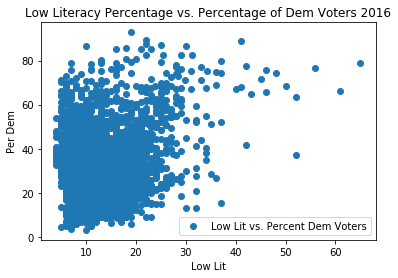

In [26]:
x = df3['per_lacking_basic_prose_literacy']
y = df3['per_dem_100']

plt.scatter(x, y, label = "Low Lit vs. Percent Dem Voters" )

plt.xlabel('Low Lit')
plt.ylabel('Per Dem')


plt.title('Low Literacy Percentage vs. Percentage of Dem Voters 2016')
plt.legend()
plt.show()


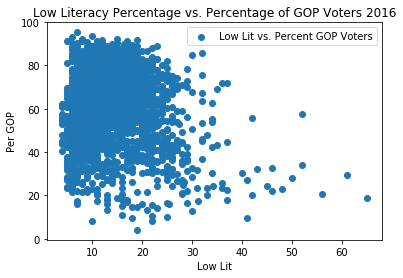

In [27]:
x = df3['per_lacking_basic_prose_literacy']
y = df3['per_gop_100']

plt.scatter(x, y, label = "Low Lit vs. Percent GOP Voters" )

plt.xlabel('Low Lit')
plt.ylabel('Per GOP')

plt.title('Low Literacy Percentage vs. Percentage of GOP Voters 2016')
plt.legend()
plt.show()


## Conclusion

When comparing the percantage of U.S. citizens lacking basic prose literacy skills by county district to the county-level results of the 2016 Presidential election, there is no significant relationship between a lack of literacy skills and voting Republican or Democrat. This does not prove out the hypothesis that a lack of prose literacy, and more broadly media literacy, had an impact on whether certain voter groups were swayed to vote for either party. 

That said, despite the prevailing idea that Republican voters were heavily impacted by paid media campaigns using "fake news," the relationship was not evident in this dataset. Moreover, 2016 Democrat voters actually showed a higher liklihood (though, a weak one) to be low literacy voters. There was also a slightly inverse relationship between low literacy and voting Republican in 2016. 